# Presenting the data set

In [5]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D, axes3d
import matplotlib.pyplot as plt

# reading the xls file
SC_D = pd.read_csv('DaylightData_StateCollege_AE597.csv')

X = SC_D.iloc[:,:8].values
y = SC_D.iloc[:, 8].values
# splitting the data set

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=60)

print(X.shape)
print(y.shape)


(3285, 8)
(3285,)


In [6]:
SC_D.head(10)

,Encoded_data,Direct_irradiance,Diffused_irradiance,Sd/Ed_ratio,3rd_sensor,Final_2_sensor daylight signal,Final_2_sensor signal,Dimming_level,Shades
0,10108.5,104,69,2.363636,34,26,130.551749,95.151672,3
1,10109.5,45,117,2.625000,53,42,145.145754,93.572154,3
2,10110.5,37,162,2.565217,74,59,160.177362,91.360830,3
3,10111.5,345,199,2.508197,189,153,243.491802,79.356498,3
4,10112.5,539,150,2.353659,238,193,277.586624,72.722526,3
5,10113.5,498,148,2.405797,201,166,248.043804,69.865880,3
6,10114.5,496,109,2.301887,155,122,208.854126,75.269874,3
7,10115.5,340,88,2.535714,81,71,165.370254,83.713615,3
8,10116.5,51,18,1.000000,28,40,130.762513,79.660619,1
9,10208.5,149,84,2.461538,42,32,135.989351,94.519865,3


# Rescaling approach

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)

# applying the StandarScaler with setting the parameter with_mean = False using method chaining

X_train_scaled = scaler.fit(X_train).transform(X_train)
X_test_scaled = scaler.fit(X_train).transform(X_test)

# print dataset properties before and after scaling

print("transformed shape: {}".format(X_train_scaled.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaled.max(axis=0)))

# transform test data

X_test_scaled = scaler.transform(X_test)

# print test data properties after scaling in order to check the positivity of the values

print("per-feature minimum after scaling:\n{}".format(X_test_scaled.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaled.max(axis=0)))

transformed shape: (2463, 8)
per-feature minimum before scaling:
 [1.01085000e+04 0.00000000e+00 2.00000000e+00 8.00000000e-01
 3.00000000e+00 3.00000000e+00 1.05187028e+02 1.00000000e+00]
per-feature maximum before scaling:
 [1.23116500e+05 1.00300000e+03 5.89000000e+02 3.75541796e+00
 1.91500000e+03 1.71100000e+03 1.73207577e+03 9.64152854e+01]
per-feature minimum after scaling:
 [0.29447826 0.         0.01979278 1.41277929 0.00748612 0.00867516
 0.32808184 0.03220292]
per-feature maximum after scaling:
 [3.58659871 3.06306008 5.82897379 6.63197089 4.7786421  4.9477346
 5.40240204 3.10485327]
per-feature minimum after scaling:
[0.29459479 0.         0.02968917 1.47164509 0.0099815  0.01156688
 0.33026316 0.03220292]
per-feature maximum after scaling:
[3.58636565 3.04779059 5.73000989 6.52858554 4.46921566 4.59494464
 5.02187998 3.09468025]


In [224]:
from sklearn.preprocessing import MinMaxScaler

scalerM = MinMaxScaler()

# applying the StandarScaler with setting the parameter with_mean = False using method chaining

X_train_scaledM = scalerM.fit(X_train).transform(X_train)
X_test_scaledM = scalerM.fit(X_train).transform(X_test)

# print dataset properties before and after scaling

print("transformed shape: {}".format(X_train_scaledM.shape))
print("per-feature minimum before scaling:\n {}".format(X_train.min(axis=0)))
print("per-feature maximum before scaling:\n {}".format(X_train.max(axis=0)))
print("per-feature minimum after scaling:\n {}".format(
    X_train_scaledM.min(axis=0)))
print("per-feature maximum after scaling:\n {}".format(
    X_train_scaledM.max(axis=0)))

# transform test data

X_test_scaledM = scalerM.transform(X_test)

# print test data properties after scaling in order to check the positivity of the values

print("per-feature minimum after scaling:\n{}".format(X_test_scaledM.min(axis=0)))
print("per-feature maximum after scaling:\n{}".format(X_test_scaledM.max(axis=0)))

transformed shape: (2463, 8)
per-feature minimum before scaling:
 [1.01085000e+04 0.00000000e+00 2.00000000e+00 8.00000000e-01
 3.00000000e+00 3.00000000e+00 1.05187028e+02 1.00000000e+00]
per-feature maximum before scaling:
 [1.23116500e+05 1.00300000e+03 5.89000000e+02 3.75541796e+00
 1.91500000e+03 1.71100000e+03 1.73207577e+03 9.64152854e+01]
per-feature minimum after scaling:
 [0. 0. 0. 0. 0. 0. 0. 0.]
per-feature maximum after scaling:
 [1. 1. 1. 1. 1. 1. 1. 1.]
per-feature minimum after scaling:
[3.53957242e-05 0.00000000e+00 1.70357751e-03 1.12787206e-02
 5.23012552e-04 5.85480094e-04 4.29872582e-04 0.00000000e+00]
per-feature maximum after scaling:
[0.99992921 0.99501496 0.98296422 0.98019131 0.93514644 0.92857143
 0.92501024 0.99668917]


In [225]:
from sklearn.svm import SVC

# applying without scaling data set
svm = SVC(C=1)
svm.fit(X_train, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test, y_test)))

Test set accuracy: 0.73


In [226]:
# applying with Standard scaled data set
svm = SVC(C=1)
svm.fit(X_train_scaled, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaled, y_test)))

Test set accuracy: 0.98


In [227]:

# applying with MinMax scaled data set
svm = SVC(C=1)
svm.fit(X_train_scaledM, y_train)
print("Test set accuracy: {:.2f}".format(svm.score(X_test_scaledM, y_test)))

Test set accuracy: 0.99


# Classification

# MLP

In [228]:
import mglearn

In [229]:
from sklearn.neural_network import MLPClassifier


MLPC = MLPClassifier(solver='adam', random_state=0, alpha=0.0001, max_iter=650, epsilon=1e-08, hidden_layer_sizes=[5])
mlp = MLPC.fit(X_train_scaledM, y_train)

print("Accuracy on training set: {:.2f}".format(MLPC.score(X_train_scaledM, y_train)))
print("Accuracy on test set: {:.2f}".format(MLPC.score(X_test_scaledM, y_test)))



Accuracy on training set: 0.99
Accuracy on test set: 0.99


mglearn.plots.plot_2d_separator(mlp, X_train_scaledM, fill=True, alpha=.4)
mglearn.discrete_scatter(X_train_scaledM[:, 3], X_train_scaledM[:, 4], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [127]:
!pip install mlxtend


ValueError: Column(s) [0 2 5 6 7] need to be accounted for in either feature_index or filler_feature_values

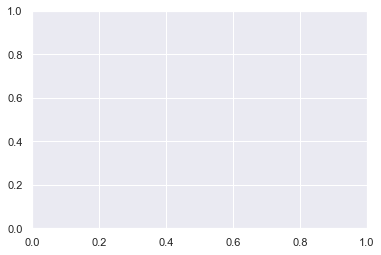

In [230]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

value=1.5
width=0.75

plot_decision_regions(X_train_scaledM, y_train, clf=MLPC,
              feature_index=[3,4],                        #these one will be plotted  
              filler_feature_values={1: value, 3:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width})

# Plotting decision regions
# plot_decision_regions(X_train_scaledM[], y_train, clf=MLPC, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('MLPC on DaylightData_StateCollege_AE597')
plt.show()

# SVM

In [231]:
from sklearn.svm import SVC
svc = SVC(kernel='rbf', C=1, gamma=1)
svm = svc.fit(X_train_scaledM, y_train)

print("Accuracy on training set: {:.2f}".format(svc.score(X_train_scaledM, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test_scaledM, y_test)))


Accuracy on training set: 0.99
Accuracy on test set: 0.99


In [232]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

models = (svm.SVC(kernel='linear', C=C),
          svm.LinearSVC(C=C, max_iter=200),
          svm.SVC(kernel='rbf', gamma=0.7, C=C),
          svm.SVC(kernel='poly', degree=3, gamma='auto', C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X_train_scaledM[:, 0], X_train_scaledM[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

AttributeError: 'SVC' object has no attribute 'SVC'

IndexError: index 1 is out of bounds for axis 1 with size 1

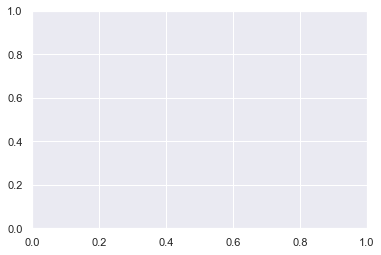

In [233]:
x = X_train_scaledM[:, 3:4]
mglearn.plots.plot_2d_separator(svm, x , eps=.5)
mglearn.discrete_scatter(X_train_scaledM[:, 3], X_train_scaledM[:, 4], y_train)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# Regression

Pytorch regression example

In [135]:
!pip install torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html


Looking in links: https://download.pytorch.org/whl/torch_stable.html


import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import imageio


torch.manual_seed(1)    # reproducible

x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

# this is one way to define a network
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
# print(net)  # net architecture
optimizer = torch.optim.SGD(net.parameters(), lr=0.2)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

# train the network
for t in range(200):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=35)
    ax.set_xlabel('Independent variable', fontsize=24)
    ax.set_ylabel('Dependent variable', fontsize=24)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 24, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 24, 'color':  'red'})

    # Used to return the plot as an image array 
    # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
    fig.canvas.draw()       # draw the canvas, cache the renderer
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   


# save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

# Linear regression

In [24]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

daylight_data1 = SC_D.drop(['Encoded_data'],axis=1)



In [8]:
daylight_data1.describe()

,Direct_irradiance,Diffused_irradiance,Sd/Ed_ratio,3rd_sensor,Final_2_sensor daylight signal,Final_2_sensor signal,Dimming_level,Shades
count,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000,3285.000000
mean,330.626484,171.673668,2.323182,440.987823,401.676712,464.017971,47.731720,1.613699
std,325.868138,100.802342,0.561542,399.005676,344.650024,319.565616,30.937025,0.859280
min,0.000000,2.000000,0.800000,3.000000,3.000000,105.187028,1.000000,1.000000
25%,0.000000,91.000000,1.930168,135.000000,130.000000,216.584990,18.071226,1.000000
50%,219.000000,154.000000,2.348485,279.000000,275.000000,339.027494,53.452414,1.000000
75%,644.000000,233.000000,2.662651,686.000000,602.000000,642.185531,74.302043,3.000000
max,1003.000000,589.000000,3.755418,1915.000000,1711.000000,1732.075771,96.415285,3.000000


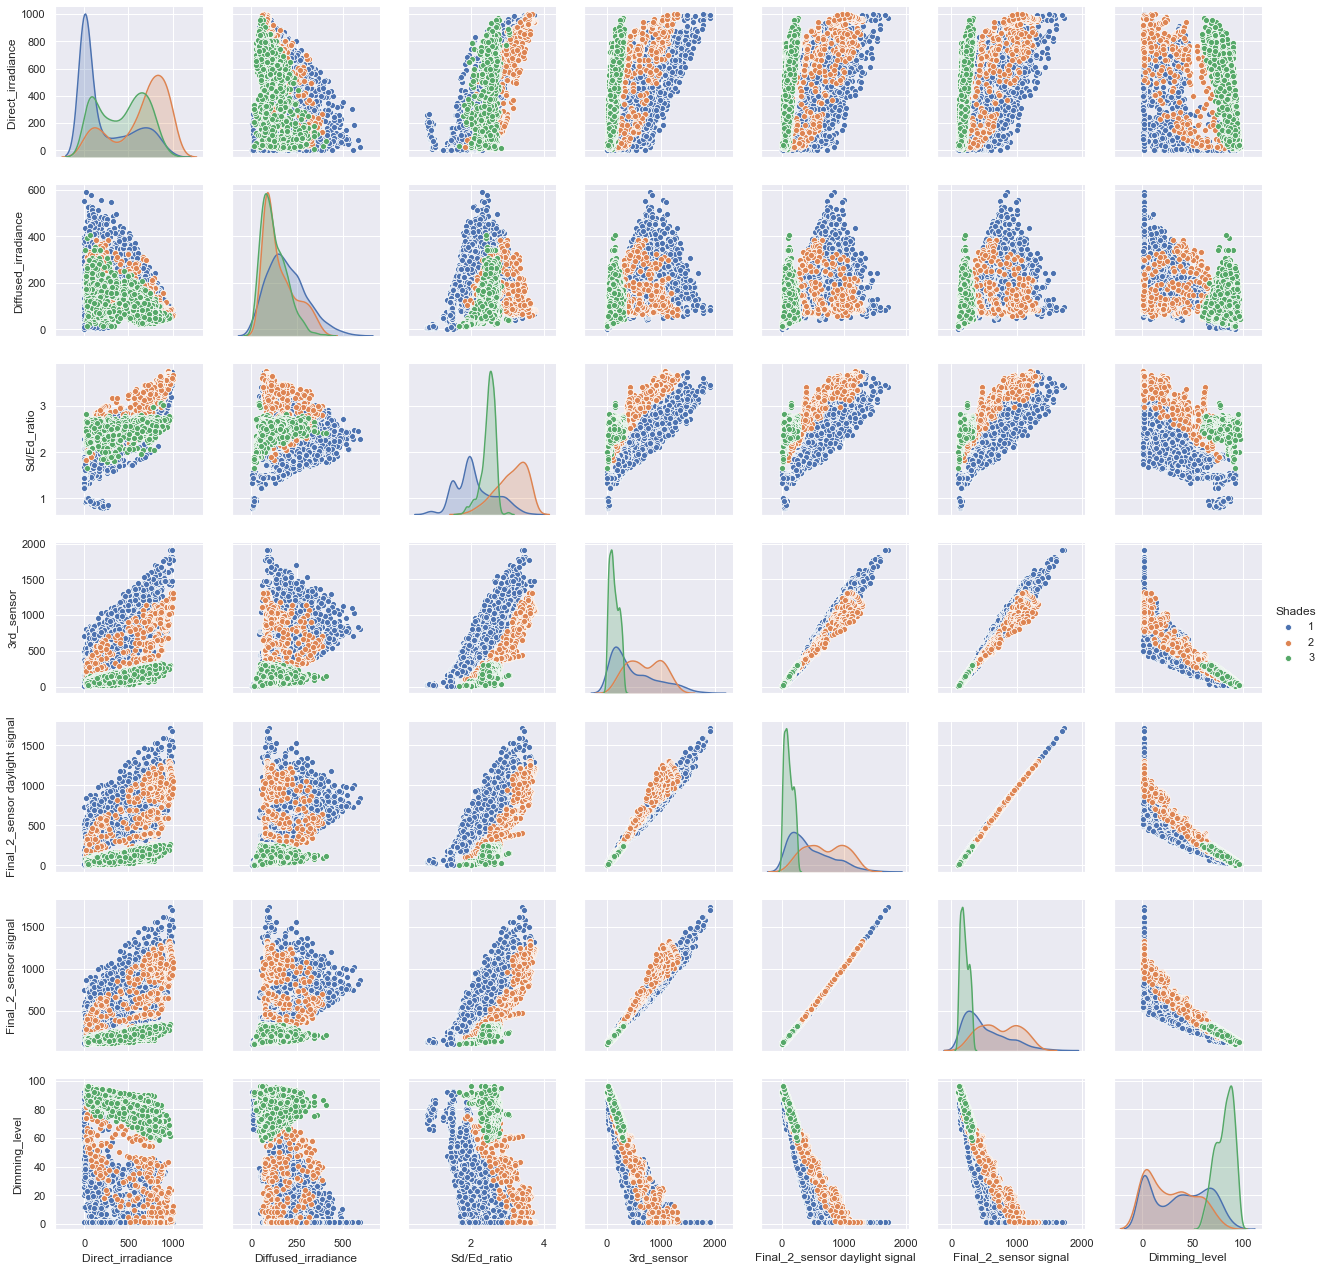

In [236]:
p=sns.pairplot(daylight_data1, hue = 'Shades')

In [9]:
X1 = SC_D['3rd_sensor']
y1 = SC_D['Sd/Ed_ratio']

In [60]:
y1

0       2.363636
1       2.625000
2       2.565217
3       2.508197
4       2.353659
          ...   
3280    1.748344
3281    1.617021
3282    1.435897
3283    1.438596
3284    1.444444
Name: Sd/Ed_ratio, Length: 3285, dtype: float64

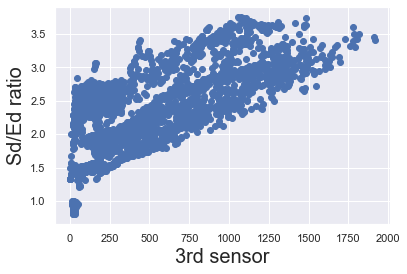

In [17]:
import statsmodels.api as sm
from statsmodels.api import add_constant
plt.scatter(X1,y1)
 
plt.xlabel('3rd sensor', fontsize = 20)
 
plt.ylabel('Sd/Ed ratio', fontsize = 20)
 
plt.show()

In [118]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.4,random_state=42)
X1_train1 = add_constant(X1_train)
X1_test1 = add_constant(X1_test)
 
results1 = sm.OLS(y1_train,X1_train1).fit()
 
results1.summary()

y1_pred=results.predict(X1_test1)

results.params


0.41924375203337055

In [43]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Sd/Ed_ratio   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                     1449.
Date:                Wed, 02 Dec 2020   Prob (F-statistic):          4.76e-238
Time:                        18:48:12   Log-Likelihood:                -1124.3
No. Observations:                1971   AIC:                             2253.
Df Residuals:                    1969   BIC:                             2264.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9122      0.014    132.635      0.000       1.884       1.941
3rd_sensor     0.0009   2.41e-05     38.060      0.000       0.001       0.001
==============================================================================
Omnibus:                      324.748   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.282
Skew:                           0.106   Prob(JB):                     2.73e-17
Kurtosis:                       2.060   Cond. No.                         894.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

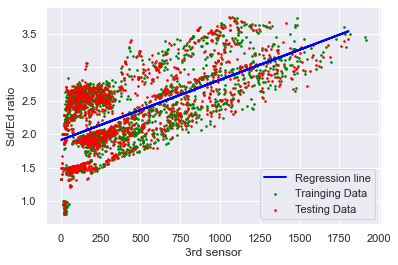

In [150]:
plt.scatter(X1_train, y1_train, marker='o',s=2.5 ,color='green',label= 'Trainging Data' )
plt.scatter(X1_test, y1_test, marker='o', color='red',s=2.5, label='Testing Data')
 
y1hat = 0.0009*X1_test + 1.9122
 
fig = plt.plot(X1_test,y1hat, lw=2, c='blue',label = 'Regression line')
 
plt.xlabel('3rd sensor')
 
plt.ylabel('Sd/Ed ratio')
plt.legend()
 
plt.show()


In [122]:
mse1 = metrics.mean_squared_error(y1_test,y1hat)
rmse1 = np.sqrt(mse1)
rmse1

0.4196276197535301

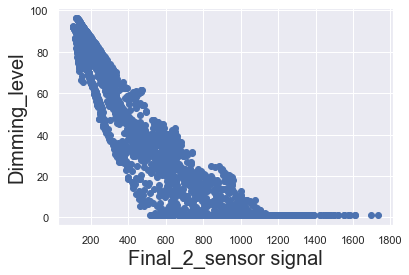

In [48]:
X2 = SC_D['Final_2_sensor signal']
y2 = SC_D['Dimming_level']

import statsmodels.api as sm
plt.scatter(X2,y2)
 
plt.xlabel('Final_2_sensor signal', fontsize = 20)
 
plt.ylabel('Dimming_level', fontsize = 20)
 
plt.show()

In [49]:
X2_train,X2_test,y2_train,y2_test = train_test_split(X2,y2,test_size=0.4,random_state=42)
X2_train1 = add_constant(X2_train)
X2_test1 = add_constant(X2_test)
 
results2 = sm.OLS(y2_train,X2_train1).fit()
 
results2.summary()

y2_pred=results.predict(X2_test1)

results.params
mse2 = metrics.mean_squared_error(y2_test,y2_pred)
rmse2 = np.sqrt(mse2)
rmse2

55.53437870256516

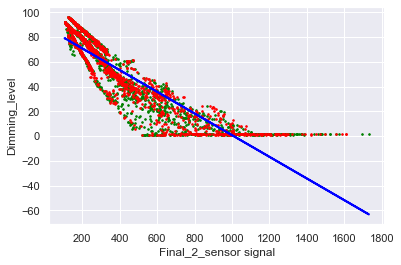

In [146]:
plt.scatter(X2_train, y2_train, marker='o',s=2.5 ,color='green',label= 'Trainging Data' )
plt.scatter(X2_test, y2_test, marker='o', color='red',s=2.5, label='Testing Data')
 
yhat = -0.0875*X2 + 88.3206
 
fig = plt.plot(X2,yhat, lw=2, c='blue', label = 'regression line')
 
plt.xlabel('Final_2_sensor signal')
 
plt.ylabel('Dimming_level')
plt.legend()
 
plt.show()

# DNN

# LSTM

# BNN

# Unsupervised learning

# PCA

In [250]:
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

pca = PCA()
X_new = pca.fit_transform(X_train_scaledM)


In [241]:
pca.get_covariance()

array([[ 0.09230494,  0.0007481 , -0.00553593, -0.004421  , -0.00489226,
        -0.00513159, -0.00494248,  0.00852299],
       [ 0.0007481 ,  0.10662654, -0.01261988,  0.0491305 ,  0.04147883,
         0.0369978 ,  0.03666781, -0.04165371],
       [-0.00553593, -0.01261988,  0.02964466,  0.0030503 ,  0.01342818,
         0.01406504,  0.01318478, -0.03029338],
       [-0.004421  ,  0.0491305 ,  0.0030503 ,  0.03672568,  0.02630986,
         0.02507712,  0.02497714, -0.02586383],
       [-0.00489226,  0.04147883,  0.01342818,  0.02630986,  0.04394699,
         0.04177566,  0.04066804, -0.06111218],
       [-0.00513159,  0.0369978 ,  0.01406504,  0.02507712,  0.04177566,
         0.04100982,  0.03989346, -0.06054815],
       [-0.00494248,  0.03666781,  0.01318478,  0.02497714,  0.04066804,
         0.03989346,  0.03885265, -0.05803504],
       [ 0.00852299, -0.04165371, -0.03029338, -0.02586383, -0.06111218,
        -0.06054815, -0.05803504,  0.10596198]])

In [242]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([5.66852245e-01, 1.98906476e-01, 1.71212820e-01, 3.53878114e-02,
       2.00297436e-02, 6.29451739e-03, 1.31638688e-03, 2.39248979e-31])

In [257]:
pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)
X_train_new, X_test_new, y_train, y_test = train_test_split(X_pca, y, test_size = 0.3, random_state=20, stratify=y)

knn_pca = KNeighborsClassifier(n_neighbors=8)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9438886472379295 %
Test score after PCA 0.9198782961460447 %


In [258]:
# Using different visualissation technique to compare the data 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
sns.set()
sns.set(rc={"figure.figsize": (10, 8)})

PALETTE = sns.color_palette('deep', n_colors=3)
CMAP = ListedColormap(PALETTE.as_hex())

def plot_iris_3d(x, y, z, title):
    sns.set_style('whitegrid')
    
    fig = plt.figure(1, figsize=(8, 6))
    ax = Axes3D(fig, elev=-150, azim=110)
    
    ax.scatter(x, y, z,
               c=iris_data['Species'],
               cmap=CMAP,
               s=40)
    
    ax.set_title(title, fontsize=20, y=1.03)
    
    fsize = 14
    ax.set_xlabel("1st eigenvector", fontsize=fsize)
    ax.set_ylabel("2nd eigenvector", fontsize=fsize)
    ax.set_zlabel("3rd eigenvector", fontsize=fsize)
    
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

In [259]:
# Visualising the Test set results using two major principal component
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

MemoryError: Unable to allocate 23.7 TiB for an array with shape (288606, 11300713) and data type float64

# NMF

In [268]:
%matplotlib inline
from sklearn.decomposition import NMF
import mglearn
from matplotlib import pyplot as plt
from sklearn.svm import SVC

# applying the NMF to the scaled x-train set with two componenets

nmf = NMF(n_components=2, random_state=42,max_iter=500)
NMF_R = nmf.fit_transform(X_train_scaledM)

print("Recovered original Dalight shadings Type shape: {}".format(NMF_R.shape))
NMF_R

Recovered original Dalight shadings Type shape: (2463, 2)


array([[0.19102559, 0.0412969 ],
       [0.0296046 , 0.13358388],
       [0.02985462, 0.22821298],
       ...,
       [0.06522162, 0.08135893],
       [0.01047607, 0.24094772],
       [0.06105394, 0.20649862]])

Text(0, 0.5, 'Second component')

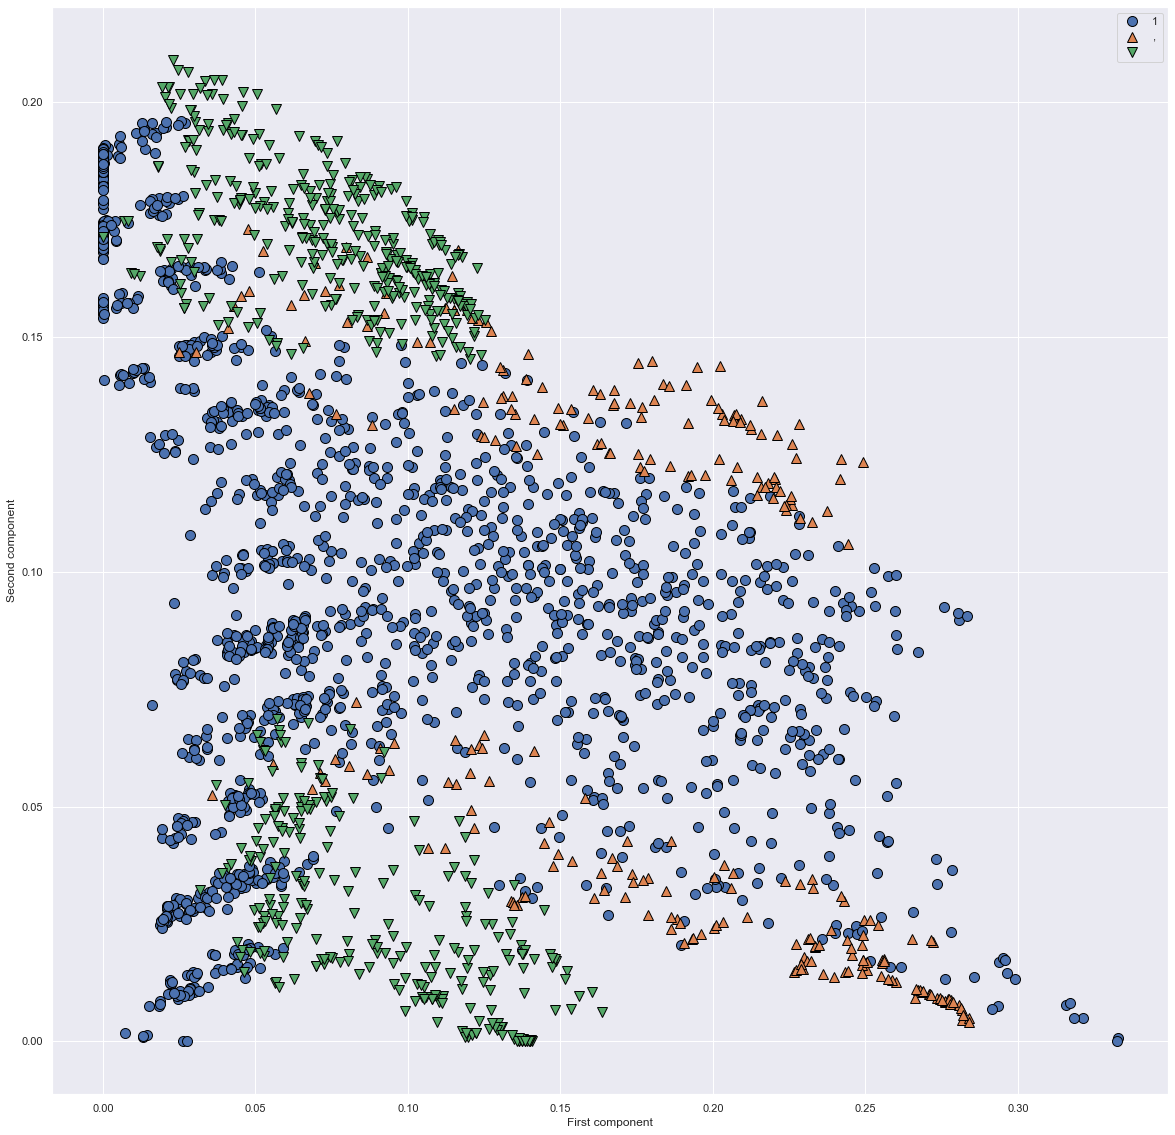

In [160]:
# plot results from NMF below

import matplotlib.pyplot as plt
plt.figure(figsize=(20, 20))
mglearn.discrete_scatter(NMF_R[:,0], NMF_R[:,1], y_train)
plt.legend('1, 2, 3', loc="best")
plt.xlabel("First component")
plt.ylabel("Second component")

# Agglomerative Clustering

In [266]:
from sklearn.cluster import AgglomerativeClustering

# Applying the agglomerative clustering model to scaled x train data set having the 2 t-SNE components

agg = AgglomerativeClustering(n_clusters=3)
Agg = agg.fit_predict(NMF_R)

Text(0, 0.5, 'Feature 1')

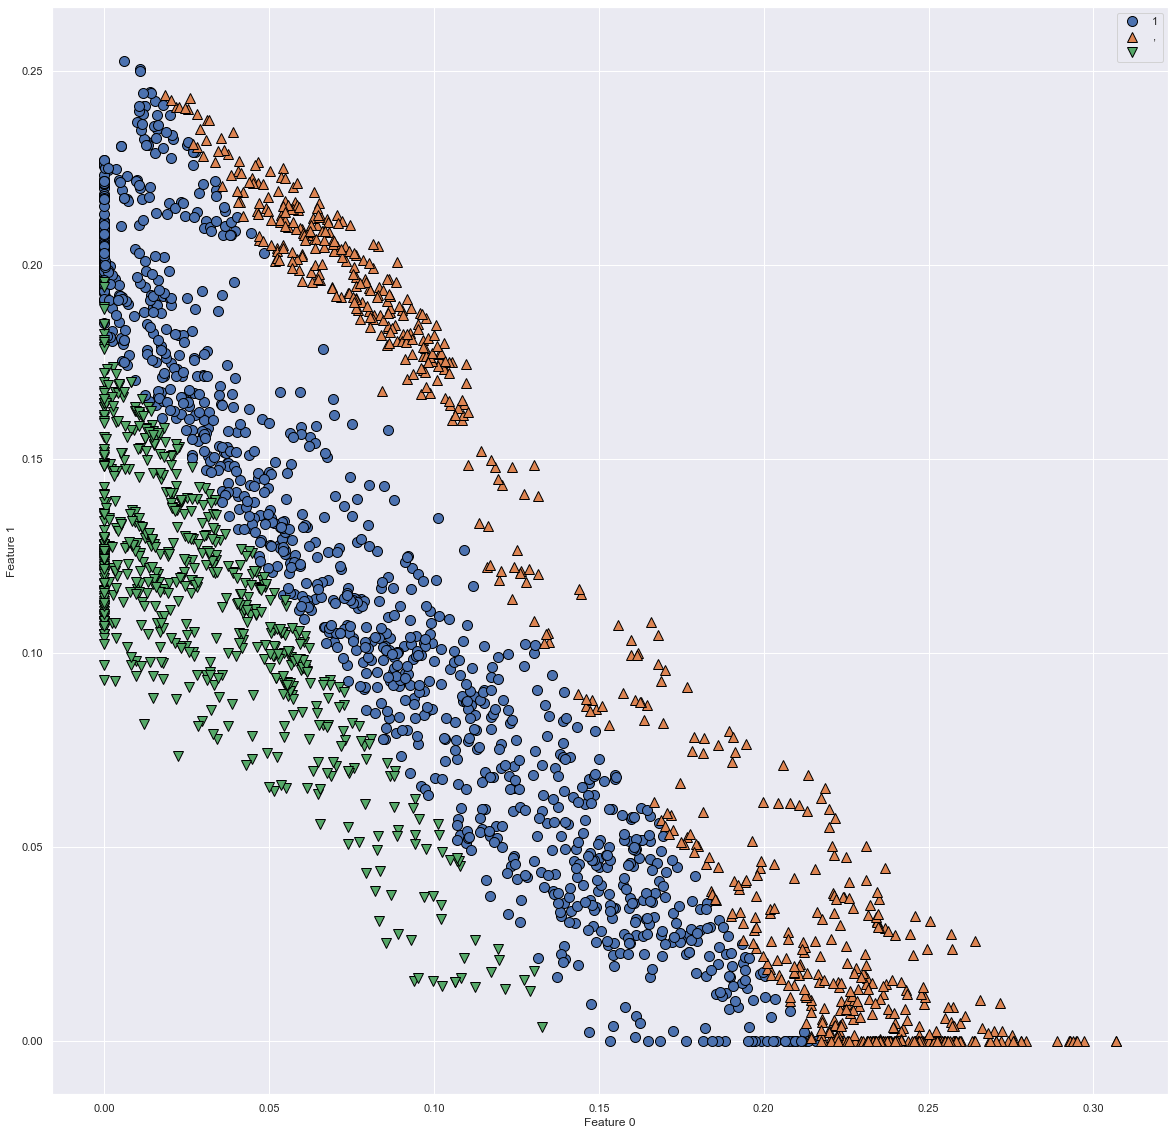

In [270]:
# plotting results from agglomerative clustring below

plt.figure(figsize=(20, 20))
mglearn.discrete_scatter(NMF_R[:, 0], NMF_R[:, 1], Agg)
plt.legend('1, 2, 3', loc="best")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

# DBSCAN

Cluster memberships:
[0 0 0 ... 0 0 0]


Text(0, 0.5, 'Feature 1')

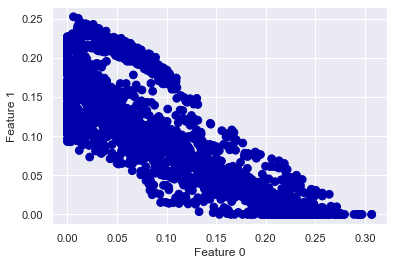

In [281]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN()

dbscan.fit(NMF_R)
print("Cluster memberships:\n{}".format(clusters))

# plot the cluster assignments
plt.scatter(NMF_R[:, 0], NMF_R[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")



In [61]:
X1

0        34
1        53
2        74
3       189
4       238
       ... 
3280    214
3281    188
3282    143
3283     72
3284     12
Name: 3rd_sensor, Length: 3285, dtype: int64

In [64]:
SC_D.head(10)

,Encoded_data,Direct_irradiance,Diffused_irradiance,Sd/Ed_ratio,3rd_sensor,Final_2_sensor daylight signal,Final_2_sensor signal,Dimming_level,Shades
0,10108.5,104,69,2.363636,34,26,130.551749,95.151672,3
1,10109.5,45,117,2.625000,53,42,145.145754,93.572154,3
2,10110.5,37,162,2.565217,74,59,160.177362,91.360830,3
3,10111.5,345,199,2.508197,189,153,243.491802,79.356498,3
4,10112.5,539,150,2.353659,238,193,277.586624,72.722526,3
5,10113.5,498,148,2.405797,201,166,248.043804,69.865880,3
6,10114.5,496,109,2.301887,155,122,208.854126,75.269874,3
7,10115.5,340,88,2.535714,81,71,165.370254,83.713615,3
8,10116.5,51,18,1.000000,28,40,130.762513,79.660619,1
9,10208.5,149,84,2.461538,42,32,135.989351,94.519865,3


SVM regression

In [157]:
from sklearn.svm import SVR
X3 = SC_D.iloc[:,4].values.astype(float).reshape(-1,1)
y3 = SC_D.iloc[:,3].values.astype(float).reshape(-1,1)

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X3 = sc_X.fit_transform(X3)
y3 = sc_y.fit_transform(y3)
X3_train,X3_test,y3_train,y3_test = train_test_split(X3,y3,test_size=0.5,random_state=20)
SVRregmod = SVR(kernel='rbf')
SVRregmod.fit(X3_train,np.ravel(y3_train,order='C'))

y3_pred=SVRregmod.predict(X3_test)


mse3 = metrics.mean_squared_error(y3_test,y3_pred)
rmse3 = np.sqrt(mse3)
rmse3

0.760332832849766

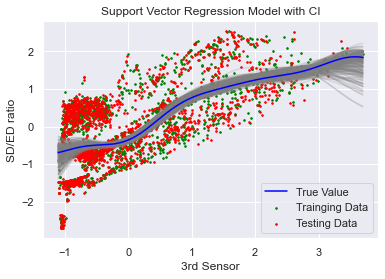

In [158]:
#6 Visualising the Support Vector Regression results
X_grid = np.linspace(min(X3), max(X3), len(y3_test))
X3_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X3_train, y3_train, marker='o',s=2.5 ,color='green',label= 'Trainging Data' )
plt.scatter(X3_test, y3_test, marker='o', color='red',s=2.5, label='Testing Data')
for i in range(0, 500):
    sample_index = np.random.choice(range(0, len(y3_train)), len(y3_train))

    X_samples = X3_train[sample_index]
    y_samples = y3_train[sample_index]    

    SVRrange = SVR(kernel='rbf')
    SVRrange.fit(X_samples,np.ravel(y_samples,order='C'))
    plt.plot(X3_grid, SVRrange.predict(X3_grid), color='grey', alpha=0.2, zorder=1)

plt.plot(X3_grid, SVRregmod.predict(X3_grid), color = 'blue',label = 'True Value')
plt.title('Support Vector Regression Model with CI')
plt.xlabel('3rd Sensor')
plt.ylabel('SD/ED ratio')
plt.legend()
plt.show()

In [131]:
from sklearn.svm import SVR
X4 = SC_D.iloc[:,6].values.astype(float).reshape(-1,1)
y4 = SC_D.iloc[:,7].values.astype(float).reshape(-1,1)

#3 Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X4 = sc_X.fit_transform(X4)
y4 = sc_y.fit_transform(y4)
X4_train,X4_test,y4_train,y4_test = train_test_split(X4,y4,test_size=0.5,random_state=20)
SVRregmod2 = SVR(kernel='rbf')
SVRregmod2.fit(X4_train,np.ravel(y4_train,order='C'))

y4_pred=SVRregmod.predict(X4_test)


mse4 = metrics.mean_squared_error(y4_test,y4_pred)
rmse4 = np.sqrt(mse4)
rmse4

1.6963183694416426

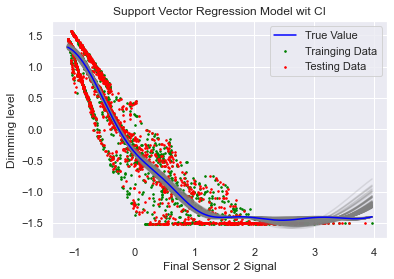

In [143]:
#6 Visualising the Support Vector Regression results
X_grid = np.linspace(min(X4), max(X4), len(y4_test))
X4_grid = X_grid.reshape((len(X_grid),1))
plt.scatter(X4_train, y4_train, marker='o',s=2.5 ,color='green',label= 'Trainging Data' )
plt.scatter(X4_test, y4_test, marker='o', color='red',s=2.5, label='Testing Data')
for i in range(0, 500):
    sample_index = np.random.choice(range(0, len(y4_train)), len(y4_train))

    X_samples = X4_train[sample_index]
    y_samples = y4_train[sample_index]    

    SVRrange = SVR(kernel='rbf')
    SVRrange.fit(X_samples,np.ravel(y_samples,order='C'))
    plt.plot(X4_grid, SVRrange.predict(X4_grid), color='grey', alpha=0.2, zorder=1)

plt.plot(X4_grid, SVRregmod2.predict(X4_grid), color = 'blue', label = 'True Value')
plt.title('Support Vector Regression Model with CI')
plt.xlabel('Final Sensor 2 Signal')
plt.ylabel('Dimming level')
plt.legend()
plt.show()